# Actividad Semanal 4

**Nombre:** Cristian Reynaldo Miranda Jimenez  
**Matrícula:** A01793718  
**Materia:** Ciencia y analítica de Datos  
**Profesor:** Jobish Vallikavungal Devassia   
**Fecha:** 10-10-2022


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:   
**X1:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.  
**X2:** Gender (1 = male; 2 = female).  
**X3:** Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).  
**X4:** Marital status (1 = married; 2 = single; 3 = others).  
**X5:** Age (year).  
**X6 - X11:** History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  
**X12-X17:** Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.  
**X18-X23:** Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


In [113]:
var_categoricas = ["X2","X3","X4","X6","X7","X8","X9","X10","X11","Y"]

### Preprocesamiento de datos

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [54]:
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")
df.drop(columns=['ID'],axis=1,inplace=True)
print(df.shape)
df.head()

(30000, 24)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [55]:
# Evaluando los valores perdidos se observa que algunas variables cuentan con filas imcompletas
df.isnull().sum() / df.shape[0] * 100

X1     0.000000
X2     0.003333
X3     0.006667
X4     0.006667
X5     0.016667
X6     0.010000
X7     0.016667
X8     0.023333
X9     0.030000
X10    0.053333
X11    0.046667
X12    0.036667
X13    0.036667
X14    0.043333
X15    0.050000
X16    0.056667
X17    0.033333
X18    0.026667
X19    0.030000
X20    0.026667
X21    0.036667
X22    0.036667
X23    0.016667
Y      0.010000
dtype: float64

In [117]:
# A continuacion se procede a eliminar aquellos registros con valores perdidos que no representan un % significativo
df_notnull = df.dropna()
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29958 non-null  int64  
 1   X2      29958 non-null  float64
 2   X3      29958 non-null  float64
 3   X4      29958 non-null  float64
 4   X5      29958 non-null  float64
 5   X6      29958 non-null  float64
 6   X7      29958 non-null  float64
 7   X8      29958 non-null  float64
 8   X9      29958 non-null  float64
 9   X10     29958 non-null  float64
 10  X11     29958 non-null  float64
 11  X12     29958 non-null  float64
 12  X13     29958 non-null  float64
 13  X14     29958 non-null  float64
 14  X15     29958 non-null  float64
 15  X16     29958 non-null  float64
 16  X17     29958 non-null  float64
 17  X18     29958 non-null  float64
 18  X19     29958 non-null  float64
 19  X20     29958 non-null  float64
 20  X21     29958 non-null  float64
 21  X22     29958 non-null  float64
 22

In [118]:
# Revisando estadisticas de las variables
df_described = df_notnull.describe().iloc[[0,1,2,3,7]].transpose()
df_described["var"] = np.power(df_described["std"],2 ).round(2)
df_described

,count,mean,std,min,max,var
X1,29958.0,167555.900928,129737.299088,10000.0,1000000.0,1.683177e+10
X2,29958.0,1.604012,0.489070,1.0,2.0,2.400000e-01
X3,29958.0,1.853094,0.790471,0.0,6.0,6.200000e-01
X4,29958.0,1.551739,0.521952,0.0,3.0,2.700000e-01
X5,29958.0,35.483443,9.214319,21.0,79.0,8.490000e+01
X6,29958.0,-0.017124,1.123989,-2.0,8.0,1.260000e+00
X7,29958.0,-0.134021,1.197171,-2.0,8.0,1.430000e+00
X8,29958.0,-0.166767,1.196026,-2.0,8.0,1.430000e+00
X9,29958.0,-0.221110,1.168419,-2.0,8.0,1.370000e+00
X10,29958.0,-0.266807,1.132307,-2.0,8.0,1.280000e+00


In [119]:
# Seleccionando solo variables continuas
df_notnull = df_notnull[df_notnull.columns.difference(var_categoricas)]
df_notnull.head()

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X5
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,24.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,26.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,34.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,37.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,57.0


In [120]:
# Se procede a escalar los datos para un mejor analisis
scaler = StandardScaler()
db = scaler.fit_transform(df_notnull)
db = pd.DataFrame(db,columns=df_notnull.columns)
db.head()

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X5
0,-1.137363,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485,-1.246282
1,-0.366561,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054,-1.029224
2,-0.597802,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407,-0.160996
3,-0.906122,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269,0.164590
4,-0.906122,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314,2.335161


In [121]:
# Revisando nuevamente los estadisticos
df_described = db.describe().iloc[[0,1,2,3,7]].transpose()
df_described["var"] = np.power(df_described["std"],2 ).round(2)
df_described

,count,mean,std,min,max,var
X1,29958.0,3.623919e-16,1.000017,-1.214443,6.416489,1.0
X12,29958.0,4.623412e-16,1.000017,-2.943086,12.396047,1.0
X13,29958.0,2.217074e-18,1.000017,-1.670797,13.126386,1.0
X14,29958.0,6.524158e-16,1.000017,-2.944427,23.305872,1.0
X15,29958.0,-1.135223e-15,1.000017,-3.313663,13.179911,1.0
X16,29958.0,-2.764718e-17,1.000017,-2.000207,14.580173,1.0
X17,29958.0,3.230961e-16,1.000017,-6.352483,15.487493,1.0
X18,29958.0,4.076914e-16,1.000017,-0.341890,52.381623,1.0
X19,29958.0,-1.073683e-16,1.000017,-0.257018,72.795041,1.0
X20,29958.0,-3.296519e-16,1.000017,-0.296782,50.565325,1.0


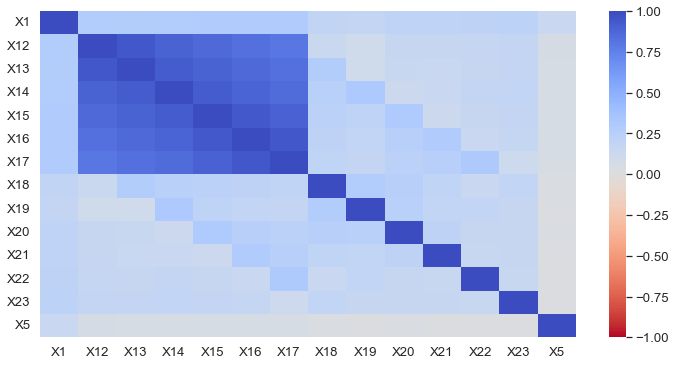

In [122]:
# Ahora se verifican las correlaciones entre variables previo al PCA
sns.heatmap(db.corr(),vmax=1,vmin=-1,cmap='coolwarm_r')
plt.show()

## Parte 1: Ejercicio guiado 

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

**Paso 1:** Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.




In [157]:
# Inicialmente se sacan los compponentes principales

pca = PCA()

db_pca = pca.fit_transform(db)


# Ahora, se determina la varianza explicada en % y acumulado de cada componente

sumPCA = pd.DataFrame({ 'Std': np.sqrt(pca.explained_variance_),
                        "% var explicada": np.round(pca.explained_variance_ratio_,4) * 100,
                        #"var explicada acumulada": np.cumsum(pca.explained_variance_ratio_) , 
                        "% var acumulada": np.cumsum(pca.explained_variance_ratio_) * 100
                        })

pca_labels = [f'PC{i + 1}' for i in range(len(db.columns))]
sumPCA.index = pca_labels
sumPCA

,Std,% var explicada,% var acumulada
PC1,2.432921,42.28,42.277891
PC2,1.309882,12.26,54.533132
PC3,1.022269,7.46,61.997411
PC4,0.961876,6.61,68.605797
PC5,0.940087,6.31,74.918180
PC6,0.934241,6.23,81.152296
PC7,0.882984,5.57,86.721112
PC8,0.852438,5.19,91.911302
PC9,0.841041,5.05,96.963631
PC10,0.514249,1.89,98.852509


In [127]:
sumPCA.shape[0]

14

In [156]:
print("Varianza total variables originales: ", db.var().sum())
print("Varianza total de los componentes: ", db_pca.var().sum())

Varianza total variables originales:  14.00046733651562
Varianza total de los componentes:  0.9999999999999999


Para visualizar de mejor manera las componentes, se procede a realizar un gráfico

Text(0, 0.5, 'cumulative explained variance')

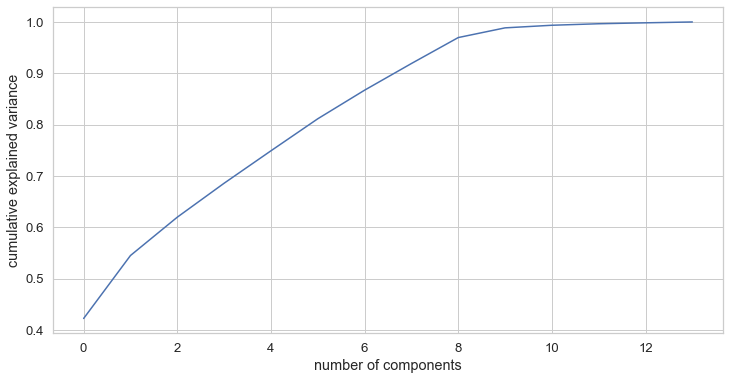

In [124]:
# grafico simple
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

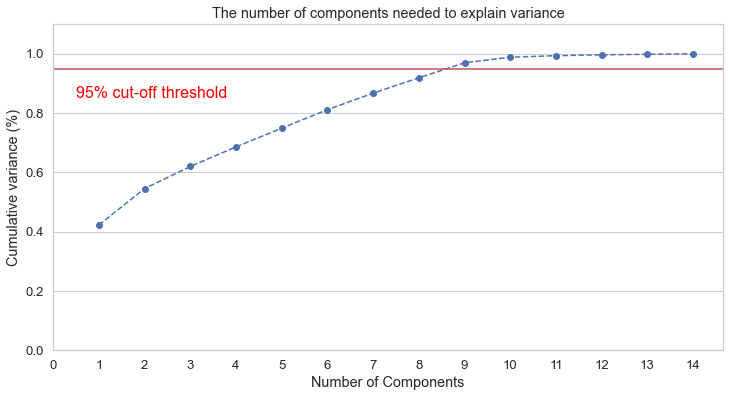

In [129]:
# Grafico con mas detalle

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, sumPCA.shape[0]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, sumPCA.shape[0]+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Como se observa en los gráficos, para explicar un 95% de la varianza se necesitan al menos 9 componentes principales. Sin embargo mientras menor es el % que se desee explicar, estas componentes se reducen por ejemplo en caso de considerar el 80% de explicación se necesitan tan solo 6 componentes.

**Paso 2:** Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.




In [130]:
pcaComponents_dfX = pd.DataFrame(pca.components_.transpose(), 
                                columns = sumPCA.index,
                                index = db.columns
                                )
pcaComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883,0.111239,-0.046381,-0.821996,-0.029201,-0.006198,0.015697,-0.000417,0.003345
X12,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987,0.008169,0.009341,0.010348,0.566716,0.416018,-0.432992,-0.183793,-0.316576
X13,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824,-0.032444,-0.135636,0.016872,0.386872,0.038425,0.345052,0.329467,0.645227
X14,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239,-0.121162,0.093077,-0.018607,0.122863,-0.484776,0.495792,-0.086466,-0.527640
X15,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527,0.126494,0.039157,0.019109,-0.205260,-0.523211,-0.489647,-0.362078,0.346095
X16,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290,-0.007584,0.049781,0.023701,-0.419992,0.068372,-0.249500,0.718388,-0.226667
X17,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272,0.007892,-0.000282,0.058701,-0.488861,0.513313,0.338689,-0.427734,0.072287
X18,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574,-0.201646,-0.748694,0.019949,-0.056581,0.047513,-0.069359,-0.044841,-0.084567
X19,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361,-0.278835,0.578491,-0.110712,0.050854,0.147307,-0.068851,0.038925,0.124894
X20,0.128056,0.392339,0.122065,0.244688,-0.239600,-0.108158,0.785216,0.068216,0.152990,0.144908,0.000139,0.124675,0.025427,-0.063096


In [132]:
pcaComponents_dfX.PC1.idxmax()

'X15'

In [135]:
pcaComponents_dfX.PC1.nlargest(4)

X15    0.391557
X16    0.388505
X14    0.388264
X13    0.383253
Name: PC1, dtype: float64

In [143]:
# Revisando componentes en valores absolutos
for i in range(pcaComponents_dfX.shape[0]):
    col_selected = pcaComponents_dfX.columns[i]
    print(col_selected)
    x = np.abs(pcaComponents_dfX[col_selected])
    print(x.nlargest(3))

PC1
X15    0.391557
X16    0.388505
X14    0.388264
Name: PC1, dtype: float64
PC2
X19    0.408391
X20    0.392339
X18    0.383194
Name: PC2, dtype: float64
PC3
X5     0.869471
X1     0.378575
X19    0.200925
Name: PC3, dtype: float64
PC4
X22    0.609833
X23    0.365692
X18    0.362055
Name: PC4, dtype: float64
PC5
X23    0.659155
X21    0.577791
X20    0.239600
Name: PC5, dtype: float64
PC6
X22    0.602388
X21    0.500809
X23    0.409151
Name: PC6, dtype: float64
PC7
X20    0.785216
X21    0.462241
X19    0.278835
Name: PC7, dtype: float64
PC8
X18    0.748694
X19    0.578491
X23    0.181276
Name: PC8, dtype: float64
PC9
X1     0.821996
X5     0.330346
X23    0.316686
Name: PC9, dtype: float64
PC10
X12    0.566716
X17    0.488861
X16    0.419992
Name: PC10, dtype: float64
PC11
X15    0.523211
X17    0.513313
X14    0.484776
Name: PC11, dtype: float64
PC12
X14    0.495792
X15    0.489647
X12    0.432992
Name: PC12, dtype: float64
PC13
X16    0.718388
X17    0.427734
X15    0.362078
Name:

Explicación de componentes:  
**PC1:** explica las variables X14,X15 Y X16 que consideran el monto de bill en usd  
**PC2:** explica el monto de pago previo en usd (X18,X19,X20)  
**PC3:** contiene las variables de credito otorgado y la edad de las personas (X1,X5)  
**PC4:** contiene más variables de pago previo pero de los últimos periodos (X22,X23)  
**PC5:** variables de pago previo (X21)  
**PC6:** variables de pago previo mismas que ya se consideran previamente  
  
Para el resto de las componentes, se van repitiendo las variables con mayor valor absoluto para explicar la varianza

**Paso 3:** Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

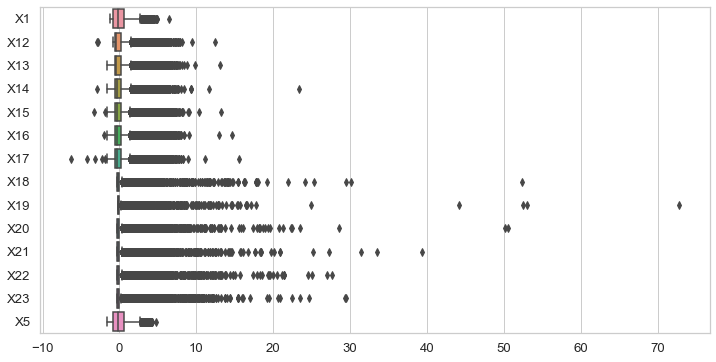

In [153]:
# Boxplot de dataset original con transformacion
sns.boxplot(data=db,orient="h")
plt.show()

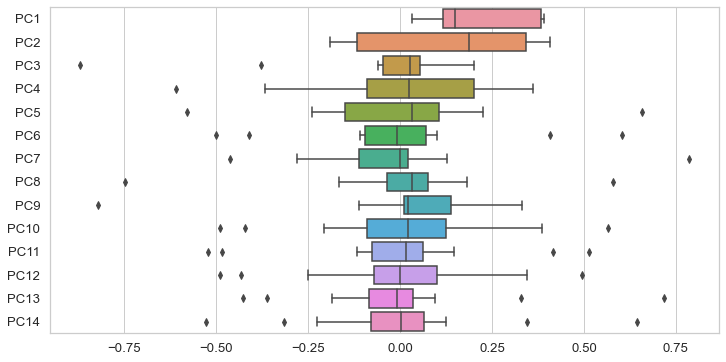

In [152]:
# Boxplot de dataset pca
sns.boxplot(data=pcaComponents_dfX,orient="h")
plt.show()

Tanto en el boxplot del dataset transformado como en el de PCA se puede observar que exiten valores atípicos por lo que s debe tener cuidado en los resultados ya que el PCA es sensible a estos

## Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

**¿Cuál es el número de componentes mínimo y por qué?**  
El número de componentes mínimo depende de la cantidad de varianza explicada que se quiere considerar para el análisis. En este caso si se toma un 80% de varianza explicada, se deben considerar 6 componentes.  

**¿Cuál es la variación de los datos que representan esos componentes?**  
Estos datos presentan el 81.15% exactamente de los datos

**¿Cuál es la pérdida de información después de realizar PCA?** 
La pérdida de información despues del PCA y considerando las 6 componentes es del 18.85% 

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**  
Las variables que tienen menor importancia en las componentes son aquellas que tienen el tiempo mucho más antiguo de pago de bill y credito otorgado. Mientras que las varaibles con mayor importancia son aquellas con información más reciente. Lo anterior tiene sentido ya que la información más reciente de un individuo permite explicar de mejor manera su comportamiento futuro.  

**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**  
Se recomienda utilizar PCA cuando existen muchas variables dentro de un dataset que se encuentran correlacionadas. Los beneficios que ofrece es poder reducir la información en una menor cantidad de dimensiones para un análisis mucho más robusto. La desventaja de esto es que se pierde la interpretación inicial del conjunto de datos a pesar de que no deja de ser una herramienta poderosa.